In [ ]:
pip install scikit-learn==1.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.2 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import precision_score
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#PEARSON PARA ELIMINAR CORRELAÇÃO MAIOR QUE 0.8

# Carrega os dados do arquivo Excel
dataset = pd.read_excel('Input_Total.xlsx')
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]
dataset = dataset.filter(regex=r'^(?!.*Keq)')

#Perason comeca aqui - Correlacao de 0.6
dataset = dataset.drop('Classe', axis=1)
dataset = dataset.drop('Composto', axis=1)
dataset = dataset.drop('Átomos', axis=1)


dataframe_pandas_features= dataset

print(dataset.columns)
corr_matrix = dataset.corr(method ='pearson', numeric_only=True).abs()

# Selecionar o triângulo superior da matriz de correlação
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar os índices das colunas com correlação maior que 0.8
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Remover apenas a primeira coluna de cada par altamente correlacionado
dataset = dataset.drop(to_drop, axis=1)



print(len(dataset.columns))
print(dataset.columns)
#sns.heatmap(correlation,cbar = True,linewidths= 0.5)
#plt.savefig('heatmap.png', dpi=1200, bbox_inches='tight')

Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_ea_media', 'atomic_ea_desvio', 'atomic_en_allen _soma',
       'atomic_en_allen _media', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_en_allredroch_soma',
       ...
       'entropia-oxidos_minimo', 'entropia-oxidos_maximo',
       'entropia-oxidos_soma', 'entropia-oxidos_media',
       'entropia-oxidos_desvio', 'deltaCp-oxidos_minimo',
       'deltaCp-oxidos_maximo', 'deltaCp-oxidos_soma', 'deltaCp-oxidos_media',
       'deltaCp-oxidos_desvio'],
      dtype='object', length=204)
48
Index(['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_ea_media', 'atomic_ea_desvio', 'atomic_en_allen _soma',
       'atomic_en_allen _media', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_en_allredroch_soma',
       'atomic_en_paul_minimo', 'atomic_hatm_minimo', 'atomic_hatm_maximo',
       'atomic_hatm_soma', 'atomic_hatm_media', 'atomic_hatm_desv

In [ ]:
#Importar dados e modelo de 204 features

import pickle

with open('X_trainGB.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open('y_trainGB.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open('X_testGB.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open('y_testGB.pickle', 'rb') as f:
    y_test = pickle.load(f)





colunas_para_manter = ['atomic_ea_minimo', 'atomic_ea_maximo', 'atomic_ea_soma',
       'atomic_ea_media', 'atomic_ea_desvio', 'atomic_en_allen _soma',
       'atomic_en_allen _media', 'atomic_en_allen _desvio',
       'atomic_en_allredroch_minimo', 'atomic_en_allredroch_soma',
       'atomic_en_paul_minimo', 'atomic_hatm_minimo', 'atomic_hatm_maximo',
       'atomic_hatm_soma', 'atomic_hatm_media', 'atomic_hatm_desvio',
       'atomic_hfu_maximo', 'atomic_hfu_soma', 'atomic_radius_soma',
       'atomic_radius_calculated_minimo', 'atomic_radius_calculated_media',
       'atomic_spacegroupnum_maximo', 'atomic_spacegroupnum_media',
       'atomic_spacegroupnum_desvio', 'brinell_hardness_maximo',
       'brinell_hardness_soma', 'bulk_mod_maximo', 'coeff_of_lte_maximo',
       'covalent_rad_emp_soma', 'critical_temperature_maximo',
       'density_of_solid_soma', 'density_of_solid_media',
       'density_of_solid_desvio', 'electrical_resist_maximo',
       'mineral_hardness_maximo', 'poissons_ratio_maximo',
       'poissons_ratio_soma', 'poissons_ratio_media', 'poissons_ratio_desvio',
       'supercond_temp_maximo', 'van_der_waals_rad_minimo',
       'vel_of_sound_minimo', 'oxidacao_maximo', 'entalpia-oxidos_maximo',
       'electronegativity_ghosh_desvio', 'entropia-oxidos_soma',
       'deltaCp-oxidos_minimo', 'deltaCp-oxidos_maximo']






In [ ]:
import numpy as np
import pandas as pd



def reduzir_dimensao (reduzendo, todas_as_features, colunas_para_manter) :

  arr = reduzendo

  # obter todos os rótulos das colunas do dataframe
  rotulos_das_colunas = todas_as_features.columns.tolist()

  # criar uma lista com as posições das colunas a serem deletadas
  colunas_para_deletar = [i for i in range(len(rotulos_das_colunas)) if rotulos_das_colunas[i] not in colunas_para_manter]

  # deletar as colunas do array numpy
  arr = np.delete(arr, colunas_para_deletar, axis=1)

  return arr

#reduzir features conjunto X

#X_train = reduzir_dimensao(X_train,dataframe_pandas_features,colunas_para_manter).copy()
#X_test = reduzir_dimensao(X_test,dataframe_pandas_features,colunas_para_manter).copy()


In [ ]:
colunas_para_manter_2 = [
    "bulk_mod_maximo",
    "atomic_hatm_maximo",
    "atomic_hatm_media",
    "atomic_en_allen _desvio",
    "entropia-oxidos_soma",
    "density_of_solid_media",
    "atomic_en_allredroch_minimo",
    "atomic_hatm_soma",
    "covalent_rad_emp_soma",
    "oxidacao_maximo"
]
# DEFINIDO EM 18/11/2024

In [ ]:
X_train = reduzir_dimensao(X_train,dataframe_pandas_features,colunas_para_manter_2).copy()
X_test = reduzir_dimensao(X_test,dataframe_pandas_features,colunas_para_manter_2).copy()

In [ ]:
# DEFINIDO EM 18/11/2024
import pickle

with open('model_GB_permutation.pkl', 'rb') as f:
    modelGB = pickle.load(f)

print(colunas_para_manter_2)

labels_ingles = [
    "atomic_hatm_sum",
    "bulk_modulus_maximum",
    "atomic_hatm_mean",
    "oxidation_maximum",
    "atomic_en_allredroch_minimum",
    "atomic_en_allen_stddev",
    "density_of_solid_mean",
    "atomic_hatm_maximum",
    "covalent_radius_empirical_sum",
    "entropy_oxides_sum"
]

['atomic_hatm_soma', 'bulk_mod_maximo', 'atomic_hatm_media', 'oxidacao_maximo', 'atomic_en_allredroch_minimo', 'atomic_en_allen _desvio', 'density_of_solid_media', 'atomic_hatm_maximo', 'covalent_rad_emp_soma', 'entropia-oxidos_soma']


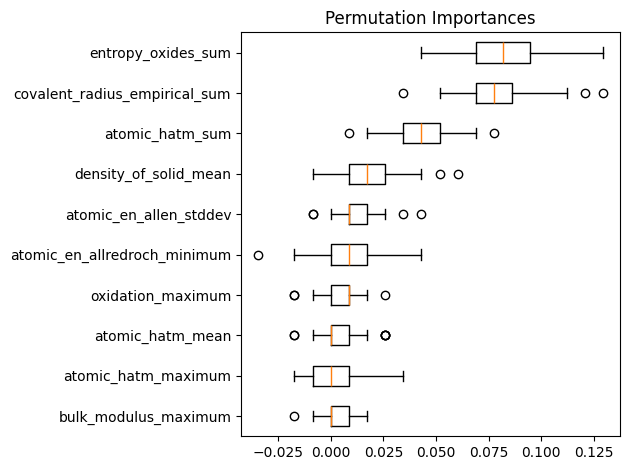

In [ ]:

from sklearn.inspection import permutation_importance

r = permutation_importance(modelGB, X_train, y_train,
                          n_repeats=30,
                           random_state=0)

# Sort the features by importance
sorted_idx = r.importances_mean.argsort()
labels_ingles = [labels_ingles[i] for i in sorted_idx]

fig, ax = plt.subplots()
ax.boxplot(r.importances[sorted_idx].T,
           vert=False, labels=labels_ingles)

ax.set_title("Permutation Importances")
fig.tight_layout()
fig.savefig('feature_importances_GB.png')  # Save the figure
plt.show()

In [ ]:
# Dados necessários para recriar o boxplot
data_to_save = {
    "importances": r.importances,
    "sorted_idx": sorted_idx,
    "features_list": labels_ingles
}

# Salvando com pickle
with open("boxplot_data_GB.pkl", "wb") as f:
    pickle.dump(data_to_save, f)